#EDA for Finding Trends and Patterns
**Date created:  28 April 2023**<br>
**Last modified:  10 May 2023**<br>

### Author: Hank Hoang

## Import libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
#Reading the data
df = pd.read_csv('data.csv')

In [67]:
df.head()

,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,...,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LAT,LON,datetime
0,01/08/2020,22:30,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,...,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,34.0141,-118.2978,2020-01-08 22:30:00
1,01/01/2020,03:30,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,...,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0459,-118.2545,2020-01-01 03:30:00
2,02/13/2020,12:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,...,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,34.0448,-118.2474,2020-02-13 12:00:00
3,01/01/2020,17:30,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,...,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,34.1685,-118.4019,2020-01-01 17:30:00
4,01/01/2020,04:15,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,...,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,34.2198,-118.4468,2020-01-01 04:15:00


In [68]:
df_sorted = df.sort_values(by='DATE OCC').reset_index(drop=True)


In [69]:
df_sorted.head()

,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,...,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LAT,LON,datetime
0,01/01/2020,16:36,4,Hollenbeck,416,2,850,INDECENT EXPOSURE,0529 2004,37,...,H,203.0,OTHER BUSINESS,NaN,NaN,IC,Invest Cont,34.0812,-118.2032,2020-01-01 16:36:00
1,01/01/2020,12:30,5,Harbor,521,2,624,BATTERY - SIMPLE ASSAULT,0942 0913 1817 0359 0448 0419 0429,19,...,W,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,33.7592,-118.2982,2020-01-01 12:30:00
2,01/01/2020,14:00,4,Hollenbeck,455,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0344 1402,0,...,X,248.0,CELL PHONE STORE,NaN,NaN,IC,Invest Cont,34.0512,-118.2093,2020-01-01 14:00:00
3,01/01/2020,02:30,4,Hollenbeck,428,1,510,VEHICLE - STOLEN,NaN,0,...,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,34.0808,-118.1738,2020-01-01 02:30:00
4,01/01/2020,20:30,5,Harbor,514,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0344 1300 1606,33,...,H,707.0,GARAGE/CARPORT,NaN,NaN,IC,Invest Cont,33.7897,-118.2787,2020-01-01 20:30:00


In [70]:
df_sorted['DATE OCC'].value_counts().sort_index()

01/01/2020     133
01/02/2020     106
01/03/2020     116
01/04/2020     106
01/05/2020     116
              ... 
12/27/2020       4
12/28/2020       8
12/29/2020       3
12/30/2020       1
12/31/2020       5
Name: DATE OCC, Length: 354, dtype: int64

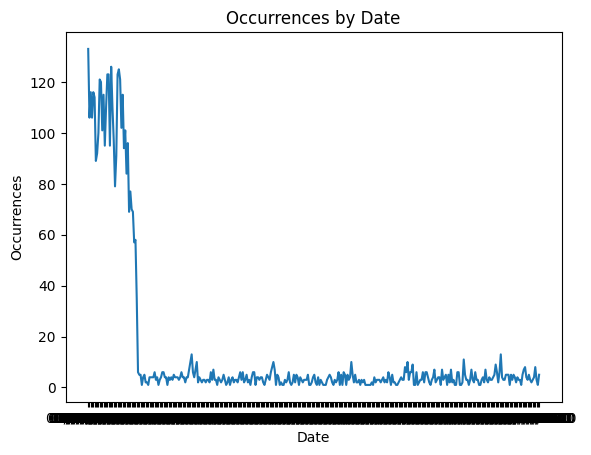

In [71]:
# Count the number of occurrences of each date
occurrences_by_date = df_sorted['DATE OCC'].value_counts().sort_index()
# Create a line graph of the occurrences by date
plt.plot(occurrences_by_date.index, occurrences_by_date.values)

# Set the labels for the x and y axes
plt.xlabel('Date')
plt.ylabel('Occurrences')

# Set the title for the graph
plt.title('Occurrences by Date')

# Display the graph
plt.show()

In [72]:
# Make a new column for months
df_sorted['DATE OCC'] = pd.to_datetime(df_sorted['DATE OCC'])
df_sorted['Month'] = df_sorted['DATE OCC'].dt.strftime('%m/%Y')

In [73]:
# Showing the number of criminal activities each month
df_sorted['Month'].value_counts().sort_index()

01/2020    3343
02/2020     605
03/2020     143
04/2020      90
05/2020     117
06/2020      81
07/2020      85
08/2020      77
09/2020     116
10/2020      98
11/2020     115
12/2020     130
Name: Month, dtype: int64

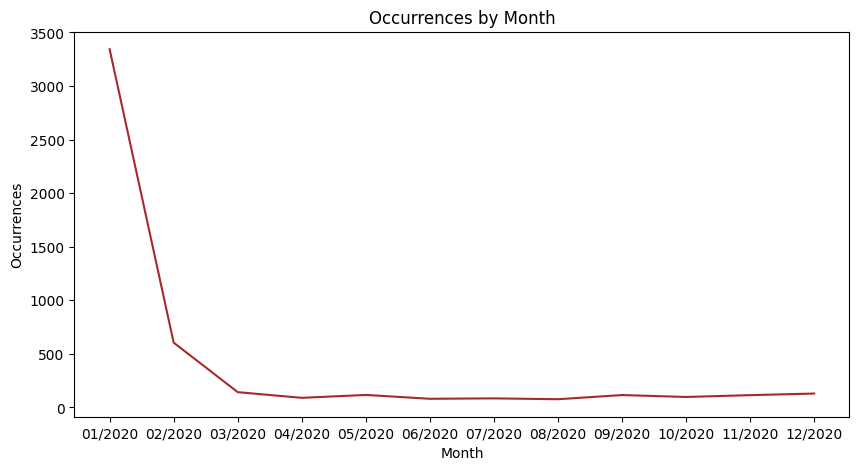

In [74]:
# Count the number of occurrences of each date
occurrences_by_month = df_sorted['Month'].value_counts().sort_index()

# Create a line graph of the occurrences by date
fig, ax = plt.subplots(figsize=(10, 5)) # Set the plot size to 10 inches wide by 5 inches tall
ax.plot(occurrences_by_month.index, occurrences_by_month.values,color='brown')

# Set the labels for the x and y axes
ax.set_xlabel('Month')
ax.set_ylabel('Occurrences')

# Set the title for the graph
ax.set_title('Occurrences by Month')

# Display the graph
plt.show()


The downward trends may be due to a lack of data.